<h1>Análise estatística dos dados</h1>


In [315]:
import math
import wordcloud
import plotnine
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from bs4 import BeautifulSoup

df_imdb_movies = pd.read_csv("Top1000IMDBMovies.csv",sep=',', encoding='utf-8')

In [316]:
df_imdb_movies['Movie Rating']

0       9.3
1       9.2
2       9.0
3       9.0
4       9.0
       ... 
1045    8.5
1046    8.5
1047    8.5
1048    8.5
1049    8.5
Name: Movie Rating, Length: 1050, dtype: float64

Pegando a média dos valores propostos


In [317]:
df_imdb_movies['Movie Rating'].mean()

8.68

O valor médio das notas é 8.68


In [318]:
df_imdb_movies['Movie Rating'].median()

8.6

A mediana das notas é 8.6


In [319]:
# Calculando o desvio
meanMovies = df_imdb_movies['Movie Rating'].mean()
d = df_imdb_movies['Movie Rating'].apply(lambda x:x-meanMovies)
d

0       0.62
1       0.52
2       0.32
3       0.32
4       0.32
        ... 
1045   -0.18
1046   -0.18
1047   -0.18
1048   -0.18
1049   -0.18
Name: Movie Rating, Length: 1050, dtype: float64

In [320]:
# Calculando o desvio absoluto médio das notas, a dispersão dos dados não é tão grande, pois é um valor pequeno.
df_imdb_movies['Movie Rating'].mad()

0.16000000000000006

In [321]:
#Variancia das notas, como é pequena, os valores estão próximos da média.
df_imdb_movies['Movie Rating'].var()

0.03923736892278364

In [322]:
# Desvio padrão das notas
df_imdb_movies['Movie Rating'].std()

0.1980842470333864

<AxesSubplot:>

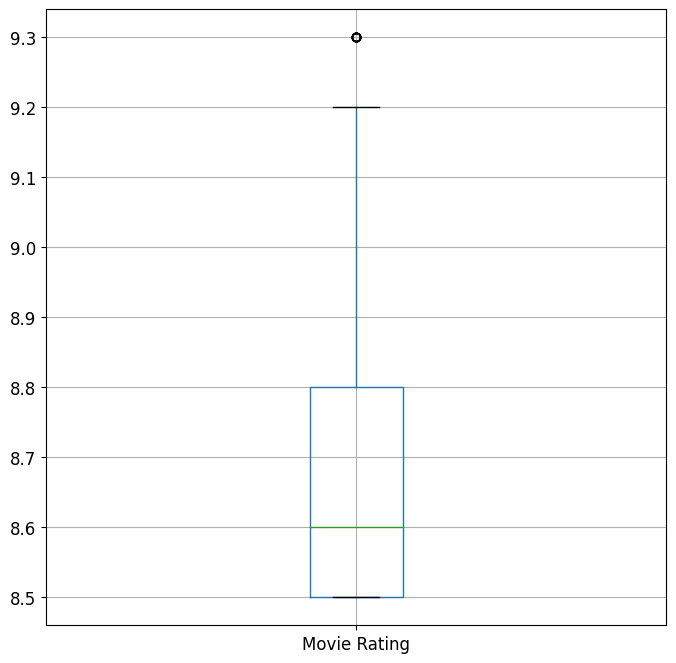

In [323]:
# Plotando os dados das notas
df_imdb_movies.boxplot(column=['Movie Rating'],fontsize='large', figsize=(8,8))

O dataset não possui um grande número de outliers, visto que estamos avaliando os 1000 melhores filmes de acordo com o IMDB, então as notas de usuários para esses filmes são bem semelhantes, e estão concentradas em determinados valores, como 8.5, 9.3, 9.2, 8.6...

Vamos ver a média de valores capturados por área, vamos notar que a maior quantidade das notas se concentra em 8.5 e 8.6

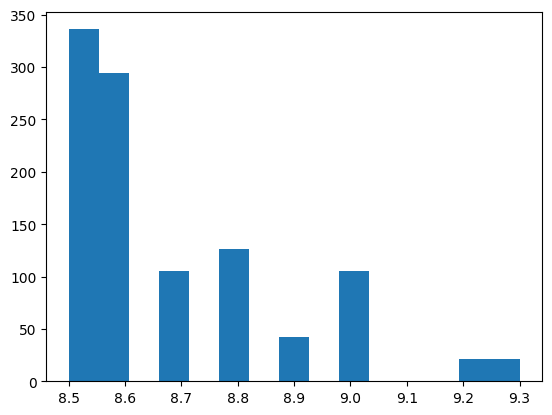

In [324]:
# Valores capturados por área
k = math.ceil(1 + 3.3 * math.log10( df_imdb_movies.size ))
plt.hist(df_imdb_movies['Movie Rating'], bins=k)
plt.show()

In [325]:
# O zscore mostra se um valor é maior ou menos que a média, e quão longe está da média
stats.zscore(df_limited_imdb['Movie Rating'])

34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
        ..
1045   NaN
1046   NaN
1047   NaN
1048   NaN
1049   NaN
Name: Movie Rating, Length: 336, dtype: float64

Vamos limitar esses valores para construir um novo gráfico.

In [326]:
# Limitando os dados para os mais repetidos.
df_limited_imdb=df_imdb_movies
df_limited_imdb=df_limited_imdb[df_limited_imdb['Movie Rating'] < 9.1]

In [327]:
k = math.ceil(1 + 3.3 *math.log10( df_imdb_movies.size ))

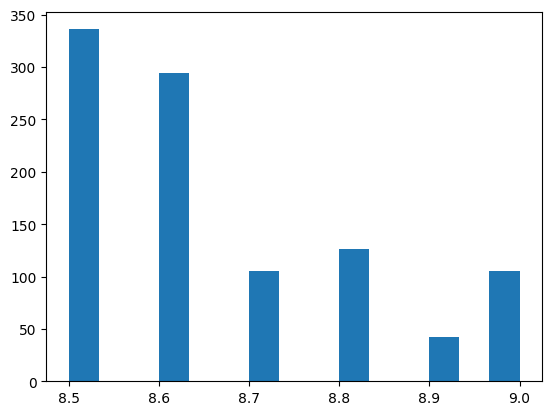

In [328]:
plt.hist(df_limited_imdb['Movie Rating'], bins=k)
plt.show()

(array([336., 294.,   0., 105.,   0.,   0., 126.,   0.,  42., 105.]),
 array([-0.95753351, -0.65112278, -0.34471206, -0.03830134,  0.26810938,
         0.5745201 ,  0.88093083,  1.18734155,  1.49375227,  1.80016299,
         2.10657371]),
 <BarContainer object of 10 artists>)

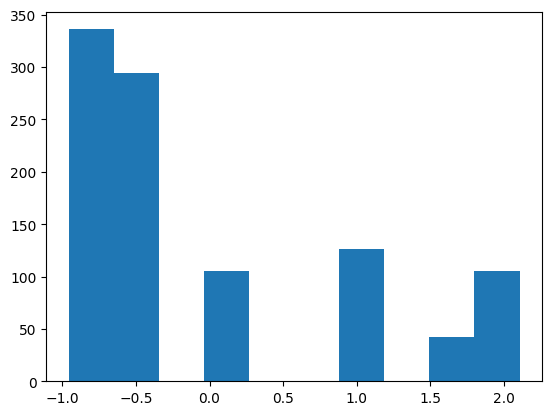

In [329]:
# Gráfico limitado ao zscore. -> Quão longe está da média?
df_limited_imdb_zscore = stats.zscore(df_limited_imdb['Movie Rating'])
plt.hist(df_limited_imdb_zscore)

<AxesSubplot:>

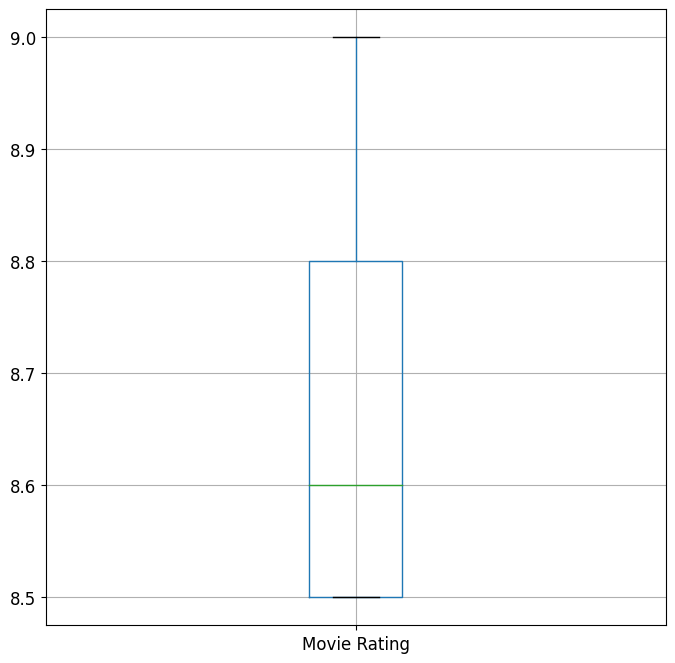

In [330]:
# Boxplot com os dados limitados.
df_limited_imdb.boxplot(column=['Movie Rating'],fontsize='large',figsize=(8,8))

Depois de limitar os valores, vemos que há maior concentração em 8.5 e 8.6, próximo a mediana calculada inicialmente.

In [331]:
df_limited_imdb=df_limited_imdb[df_limited_imdb['Movie Rating'] < df_imdb_movies['Movie Rating'].median()]

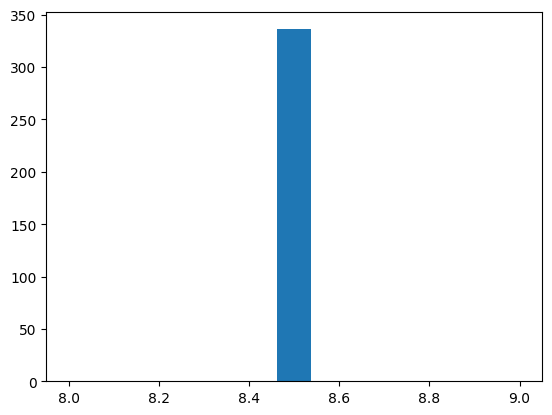

In [332]:
# Mostrando a maior concentração
k = math.ceil(1 + 3.3 * math.log10( df_limited_imdb.size ))
k
plt.hist(df_limited_imdb['Movie Rating'],bins=k)
plt.show()

<h1>Analisando outras colunas do dataset</h1>

In [333]:
df_imdb_movies_copy_watchtime=df_imdb_movies['Watchtime']

In [334]:
watchtimes=(list(set(df_imdb_movies_copy_watchtime)))
watchtimes


[130,
 132,
 133,
 136,
 137,
 139,
 141,
 142,
 145,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 161,
 164,
 168,
 169,
 175,
 178,
 179,
 189,
 195,
 201,
 202,
 207,
 88,
 89,
 96,
 106,
 110,
 112,
 116,
 118,
 119,
 121,
 124,
 125,
 127]

In [335]:
# Média de notas por watchtime
mean_watchtimes=[]
for watchtime in watchtimes:
    mean_watchtimes.append(df_imdb_movies.loc[df_imdb_movies["Watchtime"]==watchtime]["Movie Rating"].mean())
    print("O valor da nota média pelo watchtime: ", watchtime," é ",df_imdb_movies.loc[df_imdb_movies["Watchtime"]==watchtime]["Movie Rating"].mean())# mean de valores em cada área.
mean_watchtimes=[]


O valor da nota média pelo watchtime:  130  é  8.575000000000001
O valor da nota média pelo watchtime:  132  é  8.5
O valor da nota média pelo watchtime:  133  é  8.65
O valor da nota média pelo watchtime:  136  é  8.699999999999998
O valor da nota média pelo watchtime:  137  é  8.599999999999998
O valor da nota média pelo watchtime:  139  é  8.800000000000002
O valor da nota média pelo watchtime:  141  é  8.5
O valor da nota média pelo watchtime:  142  é  9.05
O valor da nota média pelo watchtime:  145  é  8.699999999999998
O valor da nota média pelo watchtime:  148  é  8.800000000000002
O valor da nota média pelo watchtime:  150  é  8.5
O valor da nota média pelo watchtime:  151  é  8.5
O valor da nota média pelo watchtime:  152  é  9.0
O valor da nota média pelo watchtime:  153  é  8.699999999999998
O valor da nota média pelo watchtime:  154  é  8.900000000000002
O valor da nota média pelo watchtime:  155  é  8.5
O valor da nota média pelo watchtime:  161  é  8.800000000000002
O val

Filmes com watchtime (exemplo = 130) tem a média de nota 8.57

In [336]:
#Mediana das notas por watchtime
median_watchtimes=[]
for watchtime in watchtimes:
    median_watchtimes.append(df_imdb_movies.loc[df_imdb_movies["Watchtime"]==watchtime]["Movie Rating"].median())
    print("O valor da mediana danota por watchtime: ", watchtime," é ",df_imdb_movies.loc[df_imdb_movies["Watchtime"]==watchtime]["Movie Rating"].median())

O valor da mediana danota por watchtime:  130  é  8.6
O valor da mediana danota por watchtime:  132  é  8.5
O valor da mediana danota por watchtime:  133  é  8.649999999999999
O valor da mediana danota por watchtime:  136  é  8.7
O valor da mediana danota por watchtime:  137  é  8.6
O valor da mediana danota por watchtime:  139  é  8.8
O valor da mediana danota por watchtime:  141  é  8.5
O valor da mediana danota por watchtime:  142  é  9.05
O valor da mediana danota por watchtime:  145  é  8.7
O valor da mediana danota por watchtime:  148  é  8.8
O valor da mediana danota por watchtime:  150  é  8.5
O valor da mediana danota por watchtime:  151  é  8.5
O valor da mediana danota por watchtime:  152  é  9.0
O valor da mediana danota por watchtime:  153  é  8.7
O valor da mediana danota por watchtime:  154  é  8.9
O valor da mediana danota por watchtime:  155  é  8.5
O valor da mediana danota por watchtime:  161  é  8.8
O valor da mediana danota por watchtime:  164  é  8.7
O valor da me

<BarContainer object of 41 artists>

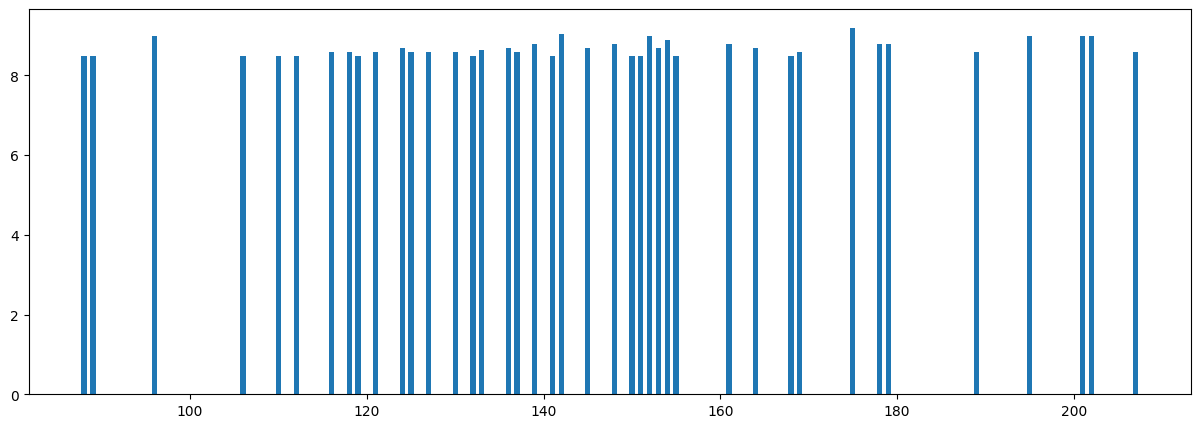

In [337]:
fig = plt.figure(figsize = (15,5))
plt.bar(watchtimes,median_watchtimes,width=0.6)

In [338]:
# Contagem dos watchtimes
for watchtime in watchtimes:
    print("A repetição do watchtime: ", watchtime," é ",len(df_imdb_movies.loc[df_imdb_movies["Watchtime"]==watchtime]))

A repetição do watchtime:  130  é  84
A repetição do watchtime:  132  é  21
A repetição do watchtime:  133  é  42
A repetição do watchtime:  136  é  21
A repetição do watchtime:  137  é  21
A repetição do watchtime:  139  é  21
A repetição do watchtime:  141  é  21
A repetição do watchtime:  142  é  42
A repetição do watchtime:  145  é  21
A repetição do watchtime:  148  é  21
A repetição do watchtime:  150  é  21
A repetição do watchtime:  151  é  21
A repetição do watchtime:  152  é  21
A repetição do watchtime:  153  é  21
A repetição do watchtime:  154  é  21
A repetição do watchtime:  155  é  42
A repetição do watchtime:  161  é  21
A repetição do watchtime:  164  é  42
A repetição do watchtime:  168  é  21
A repetição do watchtime:  169  é  42
A repetição do watchtime:  175  é  21
A repetição do watchtime:  178  é  21
A repetição do watchtime:  179  é  21
A repetição do watchtime:  189  é  21
A repetição do watchtime:  195  é  21
A repetição do watchtime:  201  é  21
A repetição 

<h1>Vamos ver Movie Rating por Ano. </h1>

In [339]:
df_imdb_movies_copy_year = df_imdb_movies['Year of release']
years=list(set(df_imdb_movies_copy_year))

In [340]:
# Media de valores de Movie Rating por ano.
mean_years=[]
for year in years:
    mean_years.append(df_imdb_movies.loc[df_imdb_movies["Year of release"]==year]["Movie Rating"].mean())
    print("O valor da média das notas por ano: ", year," é ",df_imdb_movies.loc[df_imdb_movies["Year of release"]==year]["Movie Rating"].mean())

O valor da média das notas por ano:  1946  é  8.599999999999998
O valor da média das notas por ano:  1954  é  8.599999999999998
O valor da média das notas por ano:  1957  é  9.0
O valor da média das notas por ano:  1962  é  8.599999999999998
O valor da média das notas por ano:  1966  é  8.800000000000002
O valor da média das notas por ano:  1972  é  9.199999999999998
O valor da média das notas por ano:  1974  é  9.0
O valor da média das notas por ano:  1975  é  8.699999999999998
O valor da média das notas por ano:  1977  é  8.599999999999998
O valor da média das notas por ano:  1980  é  8.699999999999998
O valor da média das notas por ano:  1988  é  8.5
O valor da média das notas por ano:  1990  é  8.699999999999998
O valor da média das notas por ano:  1991  é  8.600000000000001
O valor da média das notas por ano:  1993  é  9.0
O valor da média das notas por ano:  1994  é  8.8
O valor da média das notas por ano:  1995  é  8.55
O valor da média das notas por ano:  1997  é  8.59999999999

<BarContainer object of 32 artists>

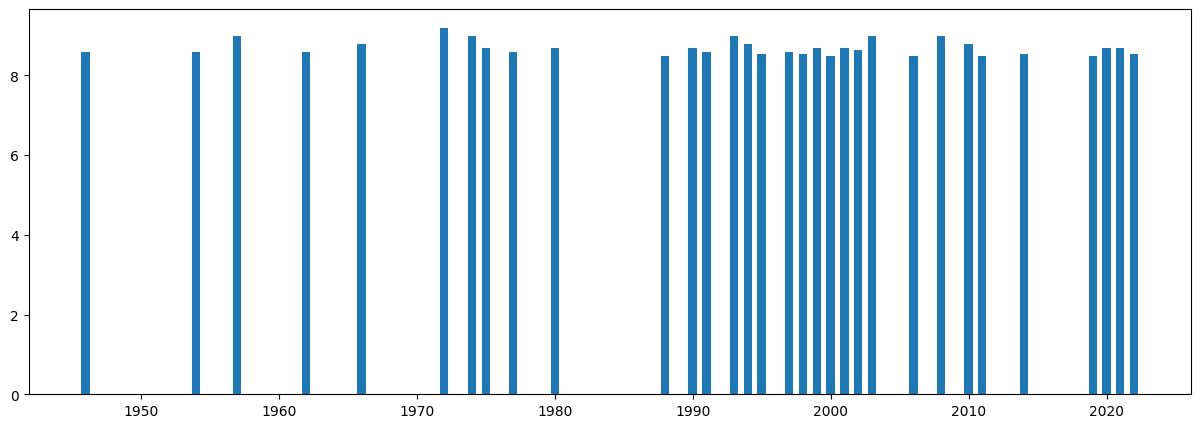

In [341]:
# Média de valores das notas por ano
fig= plt.figure(figsize=(15,5))
plt.bar(years,mean_years,width=0.6)

In [342]:
# Calculando a mediana de notas por ano
median_years=[]
for year in years:
    median_years.append(df_imdb_movies.loc[df_imdb_movies["Year of release"]==year]["Movie Rating"].mean())
    print("O valor da mediana das notas por ano: ", year," é ",df_imdb_movies.loc[df_imdb_movies["Year of release"]==year]["Movie Rating"].mean())

O valor da mediana das notas por ano:  1946  é  8.599999999999998
O valor da mediana das notas por ano:  1954  é  8.599999999999998
O valor da mediana das notas por ano:  1957  é  9.0
O valor da mediana das notas por ano:  1962  é  8.599999999999998
O valor da mediana das notas por ano:  1966  é  8.800000000000002
O valor da mediana das notas por ano:  1972  é  9.199999999999998
O valor da mediana das notas por ano:  1974  é  9.0
O valor da mediana das notas por ano:  1975  é  8.699999999999998
O valor da mediana das notas por ano:  1977  é  8.599999999999998
O valor da mediana das notas por ano:  1980  é  8.699999999999998
O valor da mediana das notas por ano:  1988  é  8.5
O valor da mediana das notas por ano:  1990  é  8.699999999999998
O valor da mediana das notas por ano:  1991  é  8.600000000000001
O valor da mediana das notas por ano:  1993  é  9.0
O valor da mediana das notas por ano:  1994  é  8.8
O valor da mediana das notas por ano:  1995  é  8.55
O valor da mediana das nota

<BarContainer object of 32 artists>

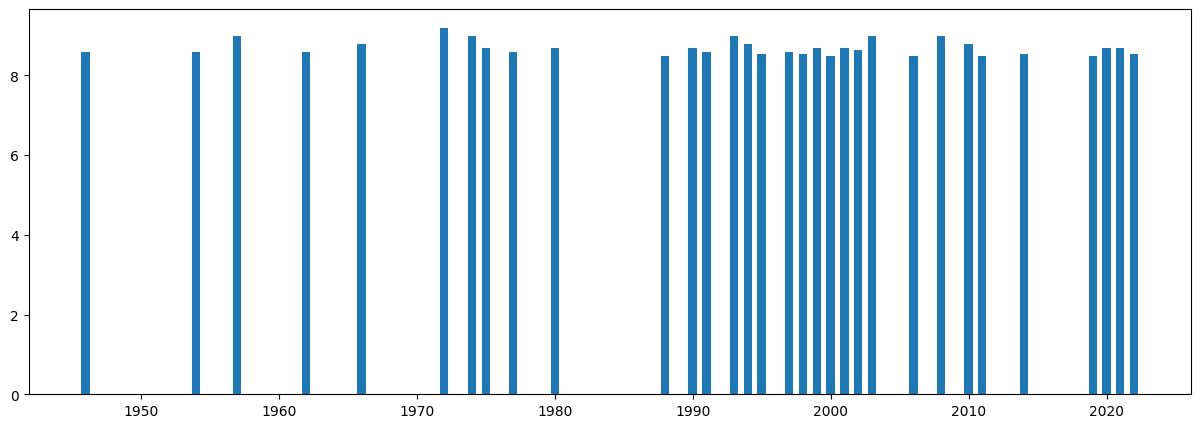

In [343]:
fig = plt.figure(figsize = (15, 5))
plt.bar(years,median_years,width=0.6)

In [344]:
# Contagem de repetição de anos
for year in years:
    print("A quantidades de filmes no ano: ", year," é ",len(df_imdb_movies.loc[df_imdb_movies["Year of release"]==year]))

A quantidades de filmes no ano:  1946  é  21
A quantidades de filmes no ano:  1954  é  21
A quantidades de filmes no ano:  1957  é  21
A quantidades de filmes no ano:  1962  é  21
A quantidades de filmes no ano:  1966  é  21
A quantidades de filmes no ano:  1972  é  21
A quantidades de filmes no ano:  1974  é  21
A quantidades de filmes no ano:  1975  é  21
A quantidades de filmes no ano:  1977  é  21
A quantidades de filmes no ano:  1980  é  21
A quantidades de filmes no ano:  1988  é  42
A quantidades de filmes no ano:  1990  é  21
A quantidades de filmes no ano:  1991  é  42
A quantidades de filmes no ano:  1993  é  21
A quantidades de filmes no ano:  1994  é  105
A quantidades de filmes no ano:  1995  é  42
A quantidades de filmes no ano:  1997  é  21
A quantidades de filmes no ano:  1998  é  42
A quantidades de filmes no ano:  1999  é  63
A quantidades de filmes no ano:  2000  é  21
A quantidades de filmes no ano:  2001  é  42
A quantidades de filmes no ano:  2002  é  63
A quantid